##Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

##Importig the Dataset

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,-1]

In [3]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

##Encoding the Categorical Data 

In [5]:
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)
X = pd.concat([X,geography,gender],axis=1)
X = X.drop(["Geography","Gender"],axis=1)


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##ANN

In [8]:
import tensorflow

In [9]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout


##Training the model

In [11]:
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu",input_dim=11))
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu"))
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))
classifier.compile(optimizer="Adamax", loss="binary_crossentropy", metrics=["accuracy"])
model = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)


Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.8245 - accuracy: 0.4430 - val_loss: 0.6483 - val_accuracy: 0.6952
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5837 - accuracy: 0.7858 - val_loss: 0.5411 - val_accuracy: 0.7974
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5192 - accuracy: 0.7981 - val_loss: 0.5035 - val_accuracy: 0.7970
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4933 - accuracy: 0.7988 - val_loss: 0.4860 - val_accuracy: 0.7997
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4773 - accuracy: 0.8026 - val_loss: 0.4724 - val_accuracy: 0.8035
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4638 - accuracy: 0.8052 - val_loss: 0.4606 - val_accuracy: 0.8035
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4520 - accuracy: 0.8085 - val_loss: 0.4518 - val_accuracy: 0.8054

In [12]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


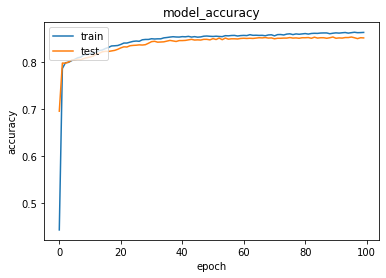

In [13]:
plt.plot(model.history["accuracy"])
plt.plot(model.history["val_accuracy"])
plt.title("model_accuracy")
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.legend(["train","test"], loc="upper left")
plt.show()

##Predicting the model

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
y_pred = (y_pred > 0.5)

In [16]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


##Confusion Matrix


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)


In [18]:
cm

array([[1518,   77],
       [ 201,  204]])

In [19]:
accuracy_score(y_test,y_pred)

0.861